In [1]:
%load_ext autoreload
%autoreload 2

import jax
import jax.random as random
import jax.numpy as jnp

import numpy as np

import ott
from ott.tools import transport

from new_linear_generation import *
from graph_new import *

from plot import Plot

import matplotlib.pyplot as plt

print(f"JAX backend: {jax.default_backend()}")

JAX backend: cpu


#### Step 1: Choose a random graph structure: 

In [2]:
key = random.PRNGKey(123)
key, subk = random.split(key)
graph_dist = ErdosReniDAGDistribution(
            n_vars=2, 
            n_edges_per_node=2)
sampled_graph = graph_dist.sample_G(key = subk)

g_gt_mat = jnp.array(graph_to_mat(sampled_graph))
g_gt_mat

DeviceArray([[0, 1],
             [0, 0]], dtype=int32)

  ### The chosen graph is the one with adjacency matrix $ \begin{bmatrix}0,1\\ 0,0\end{bmatrix} $

  ### Namely the one $ X_0 \rightarrow X_1 $

## Change only on the slope of one group: 

In [80]:
# Here case 1 with 2-d examples 
key = random.PRNGKey(12)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
for mean_edge in [-5, 5]:
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph=sampled_graph,mean_edge=mean_edge,n_observations=20)
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

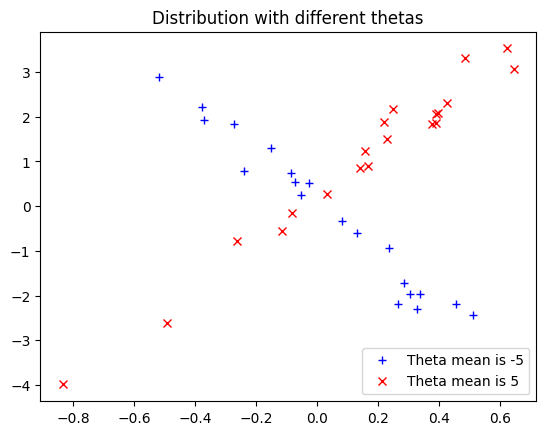

In [81]:
plt.figure(1)
plt.plot(observations1[0:20, 0], observations1[0:20, 1], '+b', label='Theta mean is -5')
plt.plot(observations1[20:, 0], observations1[20:, 1], 'xr', label='Theta mean is 5')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

#### Observe that the X-axis is between (-1,1) meaning that the data on this axis are drawn from a standard normal distribution
#### $ X_1 \rightarrow \theta X_0 + \epsilon $ 

Text(0.5, 1.0, 'Distribution with different thetas')

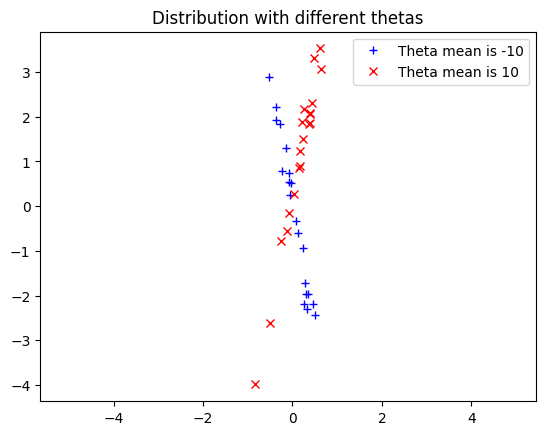

In [82]:
#plot with same axis range 
plt.figure(1)
plt.plot(observations1[0:20, 0], observations1[0:20, 1], '+b', label='Theta mean is -5')
plt.plot(observations1[20:, 0], observations1[20:, 1], 'xr', label='Theta mean is 5')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different thetas')

In [76]:
key = random.PRNGKey(124)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []
for mean_edge in [ -10, 10]:
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph=sampled_graph,mean_edge=mean_edge,n_observations=20)
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

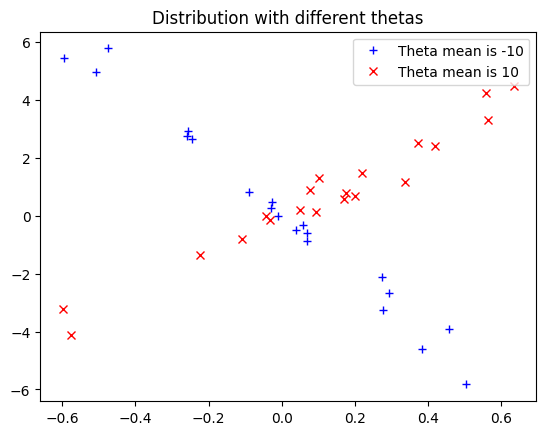

In [83]:
plt.plot(observations2[0:20, 0], observations2[0:20, 1], '+b', label='Theta mean is -10')
plt.plot(observations2[20:, 0], observations2[20:, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

Text(0.5, 1.0, 'Distribution with different thetas')

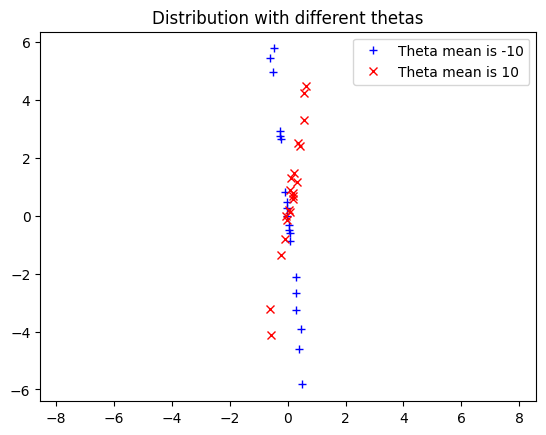

In [84]:
plt.plot(observations2[0:20, 0], observations2[0:20, 1], '+b', label='Theta mean is -10')
plt.plot(observations2[20:, 0], observations2[20:, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different thetas')

In [85]:
# Samples two point clouds and their weights.
### For our synthetic data calculate the transport matrix
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (40,))
b = jax.random.uniform(rngs[1], (40,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

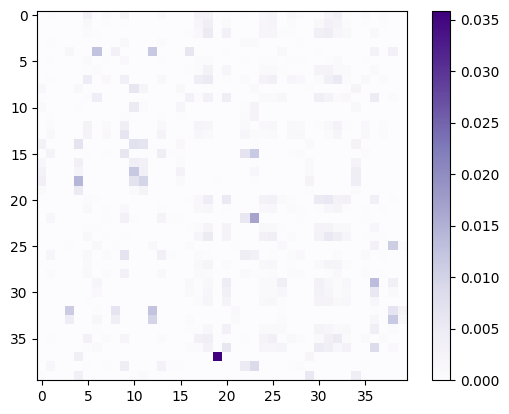

In [86]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

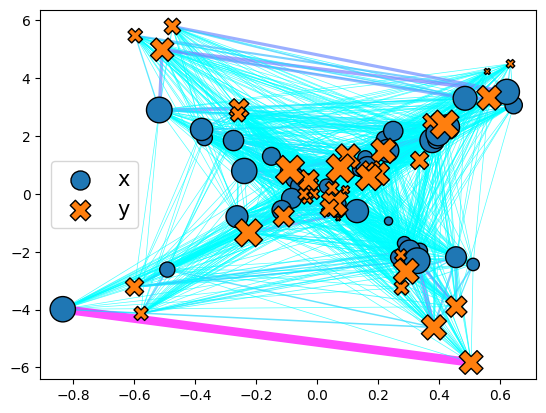

In [87]:
plott = ott.tools.plot.Plot()
_ = plott(ot)

## Now change only on the shift between the different groups:

### Here the model is: 

$X_1 \rightarrow \theta ^T X_0 + \mu_1 + \epsilon$ 

In [28]:
# Here case 1 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
for mean_distr in [-1, 1]:
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph=sampled_graph,mean_edge=0,n_observations=20, mean_distr = mean_distr)
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different mu values, same theta mean')

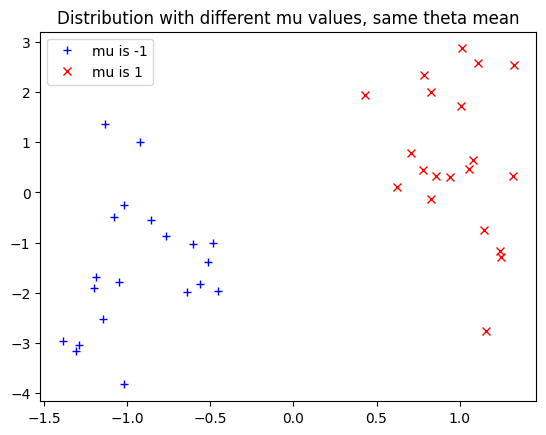

In [31]:
plt.figure(1)
plt.plot(observations1[0:20, 0], observations1[0:20, 1], '+b', label='mu is -1')
plt.plot(observations1[20:, 0], observations1[20:, 1], 'xr', label='mu is 1')
plt.legend(loc=0)
plt.title('Distribution with different mu values, same theta mean')

Text(0.5, 1.0, 'Distribution with different mu values, same theta mean')

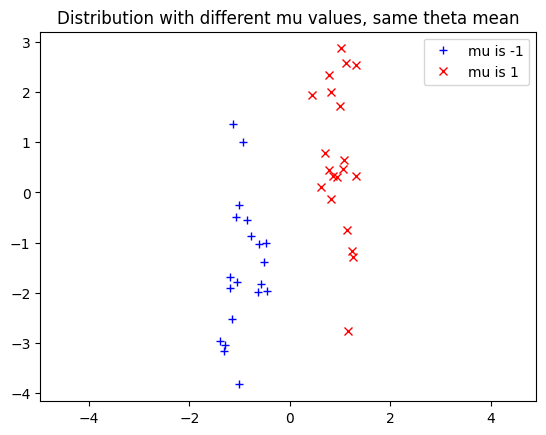

In [30]:
plt.figure(1)
plt.plot(observations1[0:20, 0], observations1[0:20, 1], '+b', label='mu is -1')
plt.plot(observations1[20:, 0], observations1[20:, 1], 'xr', label='mu is 1')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different mu values, same theta mean')

In [32]:
key = random.PRNGKey(124)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []

for mean_distr in [ -2, 1]:
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph= sampled_graph,mean_edge=0,n_observations=20, mean_distr = mean_distr)
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different mu values, same theta mean')

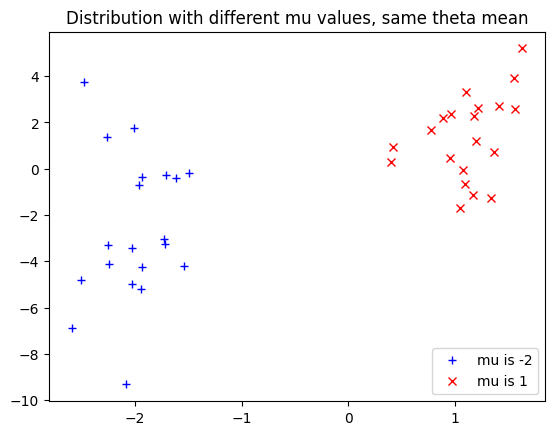

In [33]:
plt.plot(observations2[0:20, 0], observations2[0:20, 1], '+b', label='mu is -2')
plt.plot(observations2[20:, 0], observations2[20:, 1], 'xr', label='mu is 1')
plt.legend(loc=0)
plt.title('Distribution with different mu values, same theta mean')

Text(0.5, 1.0, 'Distribution with different mu values, same theta mean')

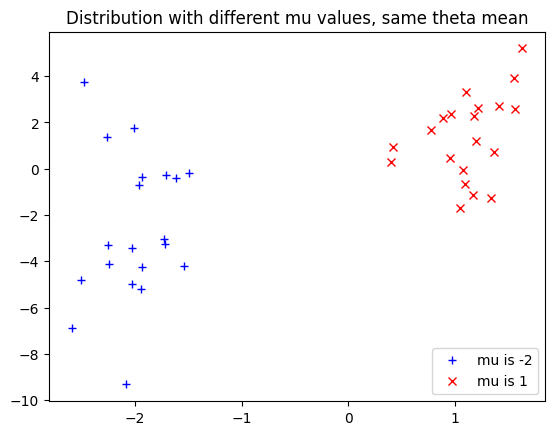

In [34]:
plt.plot(observations2[0:20, 0], observations2[0:20, 1], '+b', label='mu is -2')
plt.plot(observations2[20:, 0], observations2[20:, 1], 'xr', label='mu is 1')
plt.legend(loc=0)
plt.title('Distribution with different mu values, same theta mean')

In [35]:
# Samples two point clouds and their weights.
### For our synthetic data calculate the transport matrix
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (40,))
b = jax.random.uniform(rngs[1], (40,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

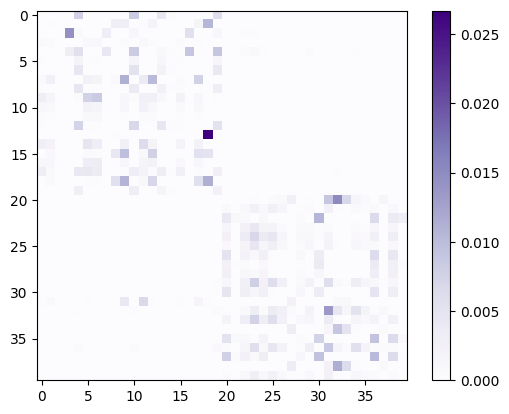

In [36]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

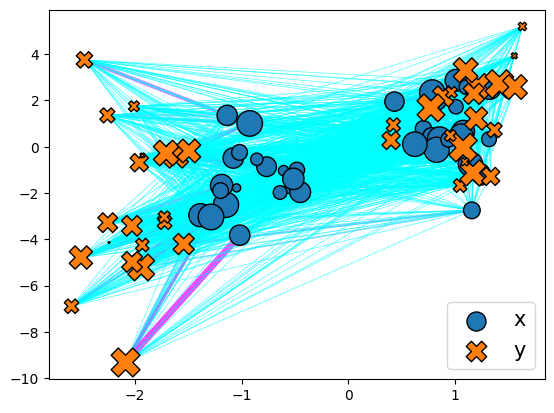

In [37]:
plott = ott.tools.plot.Plot()
_ = plott(ot)

### Check again the change in slope by making the groups more distinct:

In [53]:
# Here case 1 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
mean_distributions = [-5, 5]
for i , mean_edge in enumerate([-1, 1]):
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph=sampled_graph,mean_edge=mean_edge,n_observations=50, mean_distr = mean_distributions[i])
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

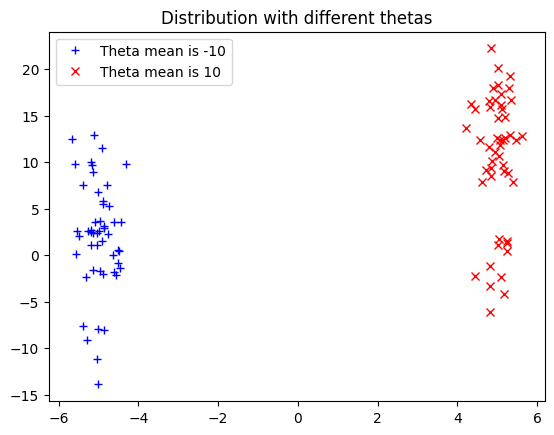

In [54]:
plt.figure(1)
plt.plot(observations1[0:50, 0], observations1[0:50, 1], '+b', label='Theta mean is -10')
plt.plot(observations1[50:, 0], observations1[50:, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

Text(0.5, 1.0, 'Distribution with different thetas')

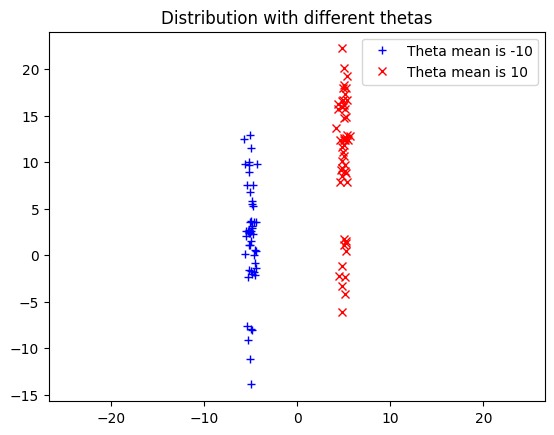

In [55]:
plt.figure(1)
plt.plot(observations1[0:50, 0], observations1[0:50, 1], '+b', label='Theta mean is -10')
plt.plot(observations1[50:, 0], observations1[50:, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different thetas')

In [56]:
#Careful: there is an effect on using very big mean values for theta e.g. -10, -20
key = random.PRNGKey(124)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []
mean_distributions = [-5, 5]
for i, mean_edge in enumerate([ -2, 1]):
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph= sampled_graph,mean_edge=mean_edge,n_observations=50, mean_distr = mean_distributions[i])
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

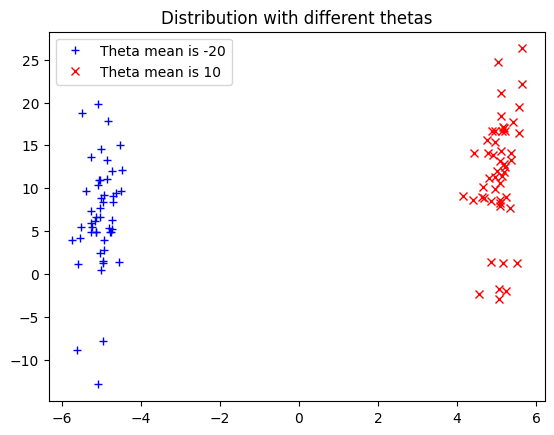

In [57]:
plt.plot(observations2[0:50, 0], observations2[0:50, 1], '+b', label='Theta mean is -20')
plt.plot(observations2[50:, 0], observations2[50:, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

Text(0.5, 1.0, 'Distribution with different thetas')

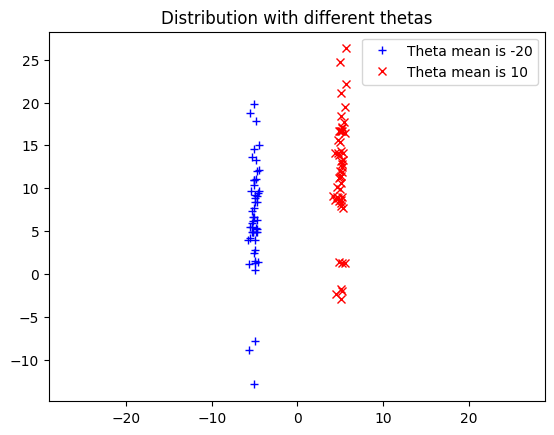

In [58]:
plt.plot(observations2[0:50, 0], observations2[0:50, 1], '+b', label='Theta mean is -20')
plt.plot(observations2[50:, 0], observations2[50:, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different thetas')

In [59]:
# Samples two point clouds and their weights.
### For our synthetic data calculate the transport matrix
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (100,))
b = jax.random.uniform(rngs[1], (100,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

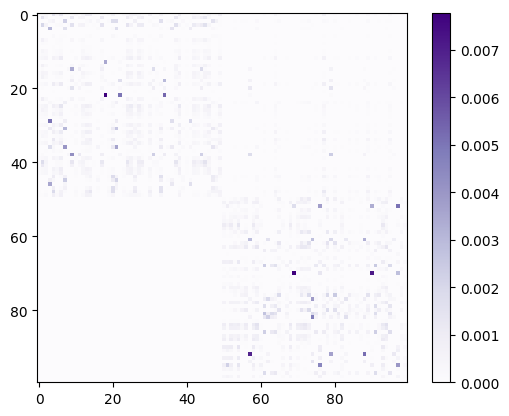

In [60]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

/home/athina/anaconda3/envs/ott_dibs/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


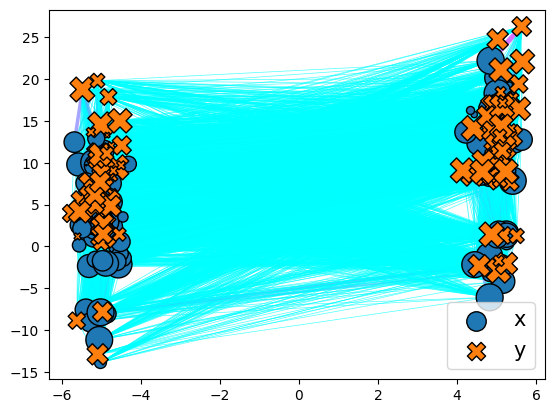

In [61]:
plott = ott.tools.plot.Plot()
_ = plott(ot)

### Now we introduce shift and change in the slope simultaneously:

In [62]:
# Here case 1 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
mean_distributions = [-3, 3]
for i , mean_edge in enumerate([-1, 1]):
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph=sampled_graph,mean_edge=mean_edge,n_observations=50, mean_distr = mean_distributions[i])
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas and mu')

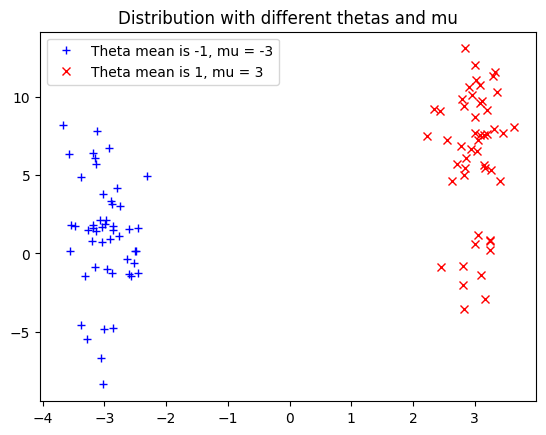

In [63]:
plt.figure(1)
plt.plot(observations1[0:50, 0], observations1[0:50, 1], '+b', label='Theta mean is -1, mu = -3')
plt.plot(observations1[50:, 0], observations1[50:, 1], 'xr', label='Theta mean is 1, mu = 3')
plt.legend(loc=0)
plt.title('Distribution with different thetas and mu')

Text(0.5, 1.0, 'Distribution with different thetas and mu')

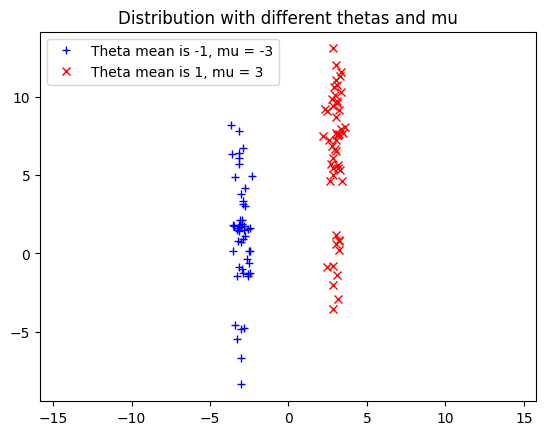

In [64]:
plt.figure(1)
plt.plot(observations1[0:50, 0], observations1[0:50, 1], '+b', label='Theta mean is -1, mu = -3')
plt.plot(observations1[50:, 0], observations1[50:, 1], 'xr', label='Theta mean is 1, mu = 3')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different thetas and mu')

In [65]:
key = random.PRNGKey(124)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []
mean_distributions = [-5, 4]
for i, mean_edge in enumerate([ -2, 1]):
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2,sampled_graph= sampled_graph,mean_edge=mean_edge,n_observations=50, mean_distr = mean_distributions[i])
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas and mu')

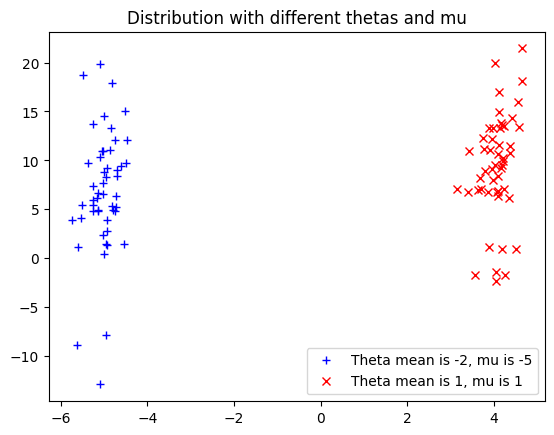

In [66]:
plt.plot(observations2[0:50, 0], observations2[0:50, 1], '+b', label='Theta mean is -2, mu is -5')
plt.plot(observations2[50:, 0], observations2[50:, 1], 'xr', label='Theta mean is 1, mu is 1')
plt.legend(loc=0)
plt.title('Distribution with different thetas and mu')

Text(0.5, 1.0, 'Distribution with different thetas and mu')

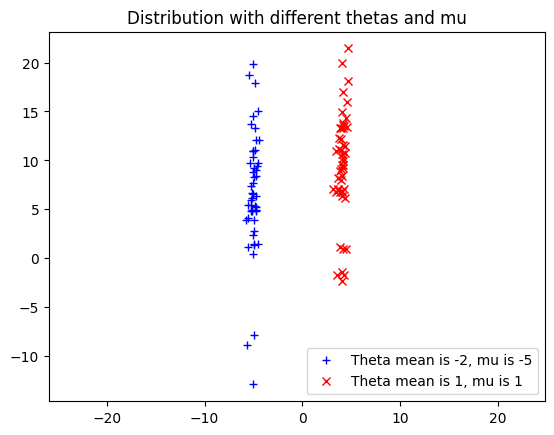

In [67]:
plt.plot(observations2[0:50, 0], observations2[0:50, 1], '+b', label='Theta mean is -2, mu is -5')
plt.plot(observations2[50:, 0], observations2[50:, 1], 'xr', label='Theta mean is 1, mu is 1')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different thetas and mu')

In [68]:
# Samples two point clouds and their weights.
### For our synthetic data calculate the transport matrix
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (100,))
b = jax.random.uniform(rngs[1], (100,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

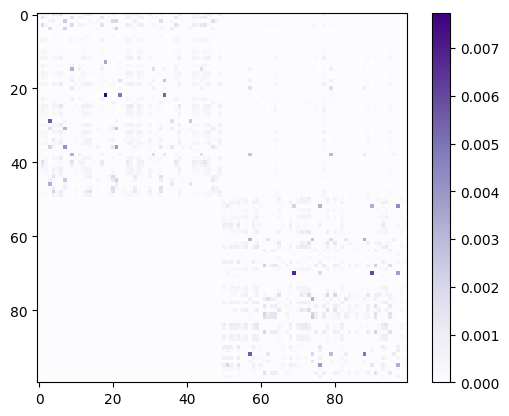

In [69]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

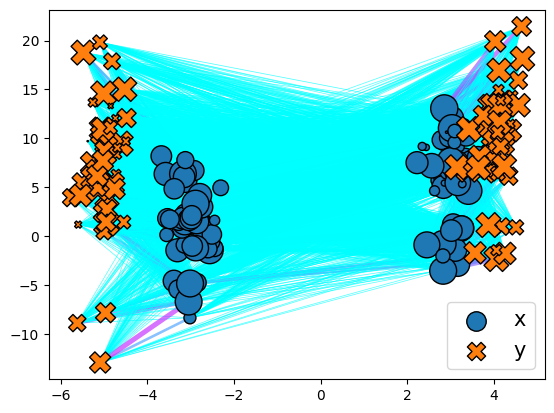

In [70]:
plott = ott.tools.plot.Plot()
_ = plott(ot)

### Case when from 2 groups we move to 3 groups on the next time point:

#### Only change the theta distribution parameters

In [93]:
# Here case 2 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
for mean_edge in [-3,3]:
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph= sampled_graph,mean_edge=mean_edge,n_observations=30)
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

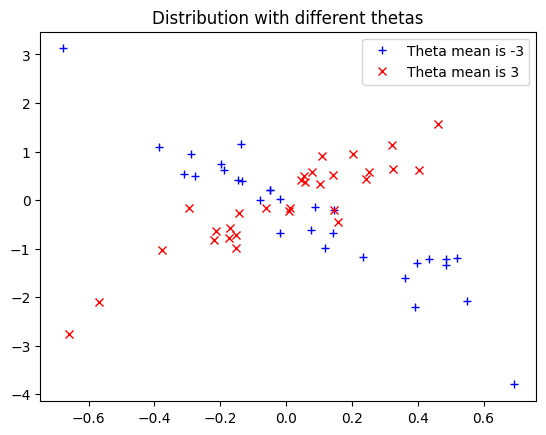

In [94]:
plt.figure(1)
plt.plot(observations1[0:30, 0], observations1[0:30, 1], '+b', label='Theta mean is -3')
plt.plot(observations1[30:, 0], observations1[30:, 1], 'xr', label='Theta mean is 3')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

Text(0.5, 1.0, 'Distribution with different thetas')

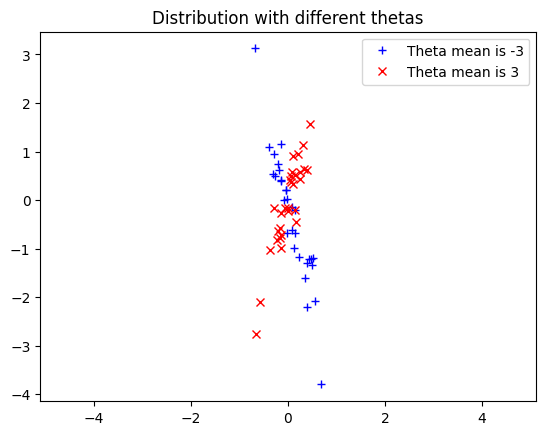

In [95]:
plt.figure(1)
plt.plot(observations1[0:30, 0], observations1[0:30, 1], '+b', label='Theta mean is -3')
plt.plot(observations1[30:, 0], observations1[30:, 1], 'xr', label='Theta mean is 3')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different thetas')

In [96]:
# Here case 2 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []
for mean_edge in [-6,-2,4]:
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph=sampled_graph,mean_edge=mean_edge,n_observations=20)
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

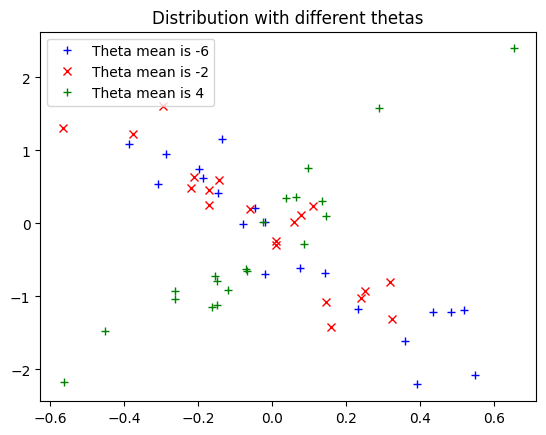

In [98]:
plt.figure(1)
plt.plot(observations2[0:20, 0], observations1[0:20, 1], '+b', label='Theta mean is -6')
plt.plot(observations2[20:40, 0], observations2[20:40, 1], 'xr', label='Theta mean is -2')
plt.plot(observations2[40:, 0], observations2[40:, 1], 'g+', label='Theta mean is 4')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

Text(0.5, 1.0, 'Distribution with different thetas')

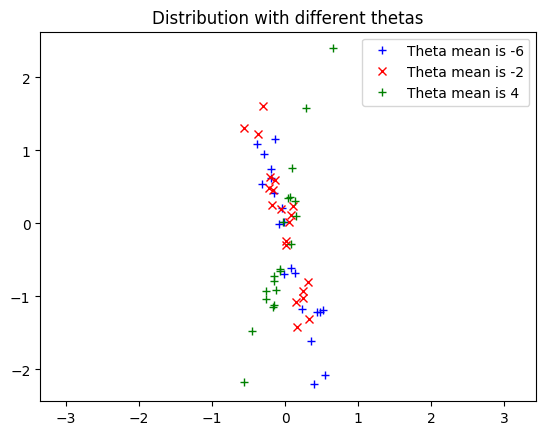

In [99]:
plt.figure(1)
plt.plot(observations2[0:20, 0], observations1[0:20, 1], '+b', label='Theta mean is -6')
plt.plot(observations2[20:40, 0], observations2[20:40, 1], 'xr', label='Theta mean is -2')
plt.plot(observations2[40:, 0], observations2[40:, 1], 'g+', label='Theta mean is 4')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different thetas')

In [100]:
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (60,))
b = jax.random.uniform(rngs[1], (60,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

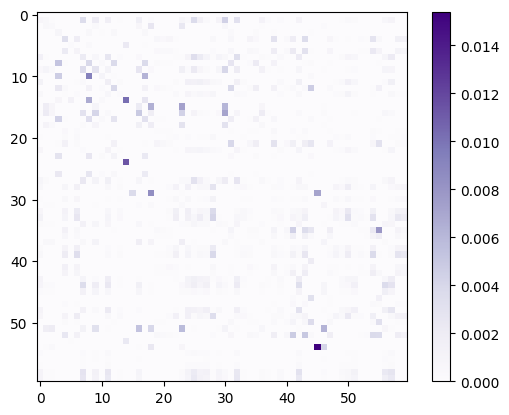

In [101]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

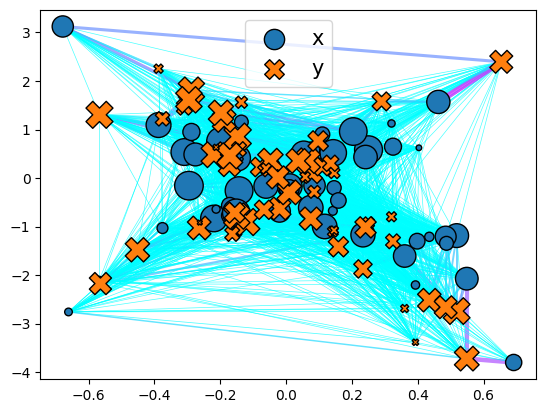

In [102]:
plott = ott.tools.plot.Plot()
_ = plott(ot)

### Now change only the mu distribution parameters:

In [108]:
# Here case 1 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
for mean_distr in [-2, 2]:
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph=sampled_graph,mean_edge=0,n_observations=30, mean_distr = mean_distr)
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different mu values, same theta mean')

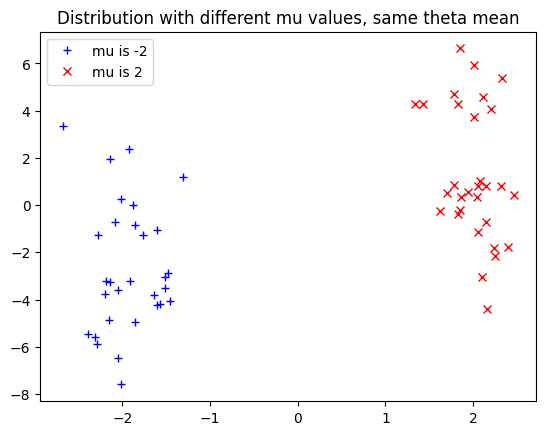

In [127]:
plt.figure(1)
plt.plot(observations1[0:30, 0], observations1[0:30, 1], '+b', label='mu is -2')
plt.plot(observations1[30:, 0], observations1[30:, 1], 'xr', label='mu is 2')
plt.legend(loc=0)
plt.title('Distribution with different mu values, same theta mean')

Text(0.5, 1.0, 'Distribution with different mu values, same theta mean')

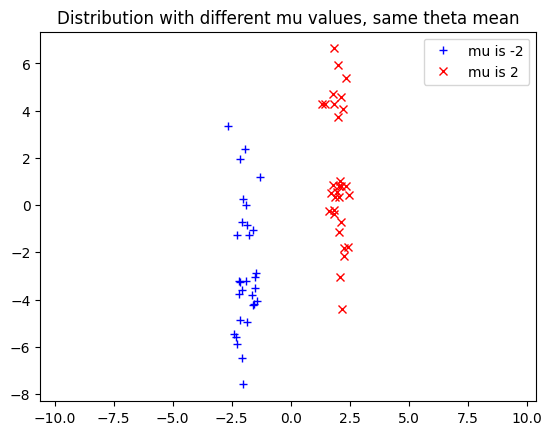

In [128]:
plt.figure(1)
plt.plot(observations1[0:30, 0], observations1[0:30, 1], '+b', label='mu is -2')
plt.plot(observations1[30:, 0], observations1[30:, 1], 'xr', label='mu is 2')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different mu values, same theta mean')

In [121]:
key = random.PRNGKey(124)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []

for mean_distr in [ -3,-1, 2]:
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph= sampled_graph,mean_edge=0,n_observations=20, mean_distr = mean_distr)
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different mu')

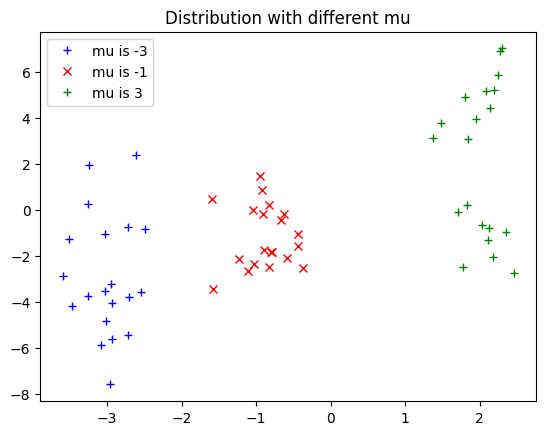

In [122]:
plt.figure(1)
plt.plot(observations2[0:20, 0], observations1[0:20, 1], '+b', label='mu is -3')
plt.plot(observations2[20:40, 0], observations2[20:40, 1], 'xr', label='mu is -1')
plt.plot(observations2[40:, 0], observations2[40:, 1], 'g+', label='mu is 2')
plt.legend(loc=0)
plt.title('Distribution with different mu')

Text(0.5, 1.0, 'Distribution with different mu')

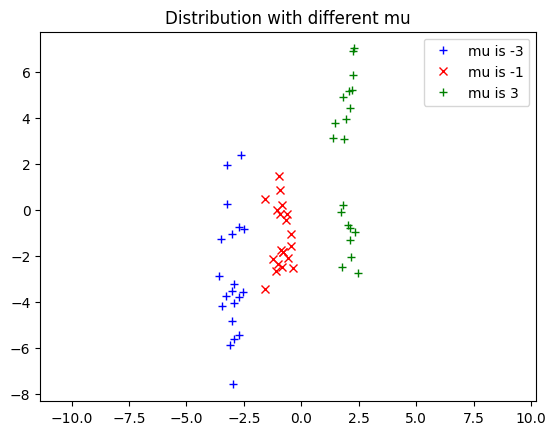

In [123]:
plt.figure(1)
plt.plot(observations2[0:20, 0], observations1[0:20, 1], '+b', label='mu is -3')
plt.plot(observations2[20:40, 0], observations2[20:40, 1], 'xr', label='mu is -1')
plt.plot(observations2[40:, 0], observations2[40:, 1], 'g+', label='mu is 3')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different mu')

In [124]:
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (60,))
b = jax.random.uniform(rngs[1], (60,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

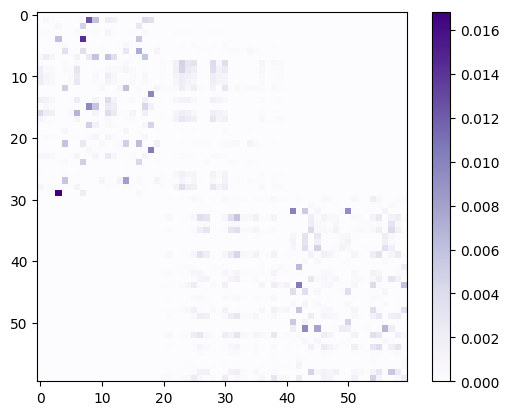

In [125]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

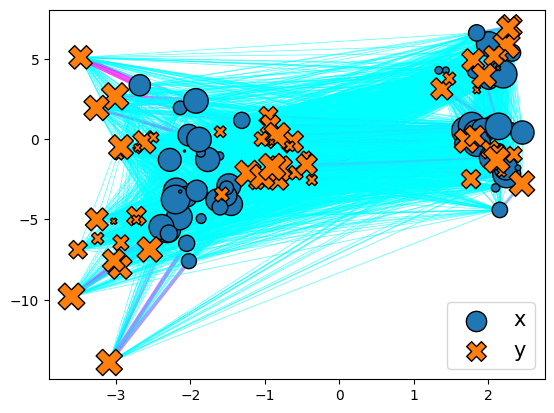

In [126]:
plott = ott.tools.plot.Plot()
_ = plott(ot)

### Now both shift and slope change simultaneously:

In [129]:
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
mean_distributions = [-2,2]
for i, mean_edge in enumerate([-3,3]):
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph=sampled_graph,mean_edge=mean_edge,n_observations=30, mean_distr=mean_distributions[i])
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different mu values and theta values')

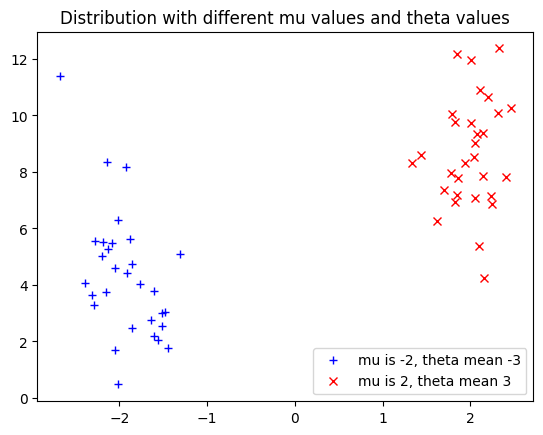

In [132]:
plt.figure(1)
plt.plot(observations1[0:30, 0], observations1[0:30, 1], '+b', label='mu is -2, theta mean -3')
plt.plot(observations1[30:, 0], observations1[30:, 1], 'xr', label='mu is 2, theta mean 3')
plt.legend(loc=0)
plt.title('Distribution with different mu values and theta values')

Text(0.5, 1.0, 'Distribution with different mu values and theta values')

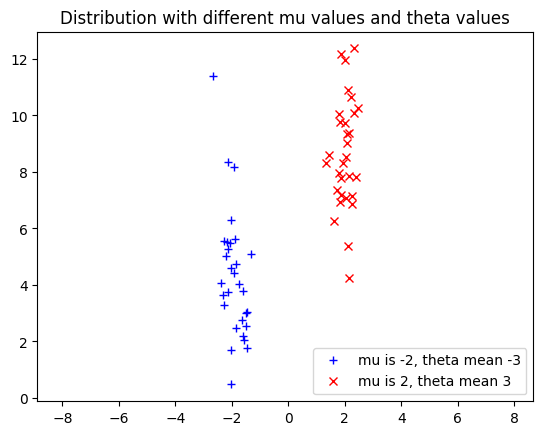

In [133]:
plt.figure(1)
plt.plot(observations1[0:30, 0], observations1[0:30, 1], '+b', label='mu is -2, theta mean -3')
plt.plot(observations1[30:, 0], observations1[30:, 1], 'xr', label='mu is 2, theta mean 3')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different mu values and theta values')

In [136]:
key = random.PRNGKey(124)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []
mean_distributions = [-3,-1,2]
for i, mean_edge in enumerate([-6,-2,4]):
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, sampled_graph= sampled_graph,mean_edge=mean_edge,n_observations=20, mean_distr= mean_distributions[i])
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different mu')

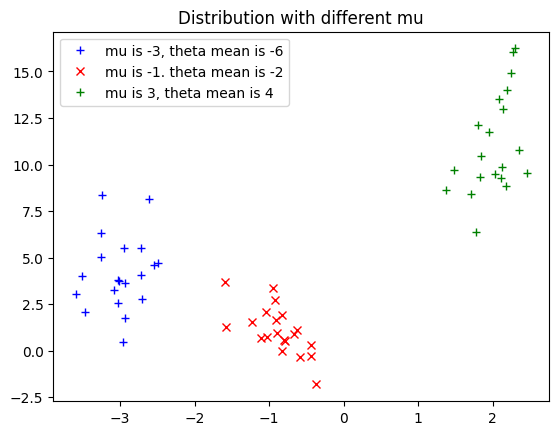

In [138]:
plt.figure(1)
plt.plot(observations2[0:20, 0], observations1[0:20, 1], '+b', label='mu is -3, theta mean is -6')
plt.plot(observations2[20:40, 0], observations2[20:40, 1], 'xr', label='mu is -1. theta mean is -2')
plt.plot(observations2[40:, 0], observations2[40:, 1], 'g+', label='mu is 3, theta mean is 4')
plt.legend(loc=0)
plt.title('Distribution with different mu')

Text(0.5, 1.0, 'Distribution with different mu')

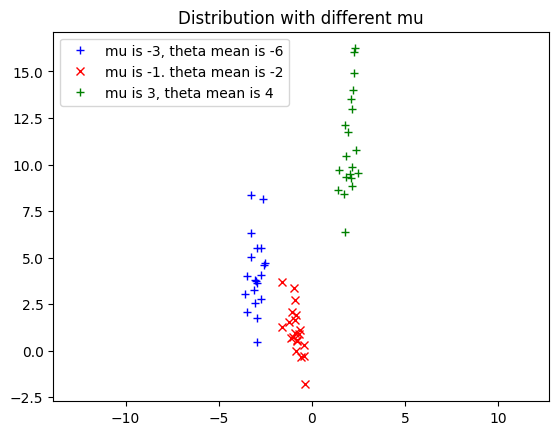

In [139]:
plt.figure(1)
plt.plot(observations2[0:20, 0], observations1[0:20, 1], '+b', label='mu is -3, theta mean is -6')
plt.plot(observations2[20:40, 0], observations2[20:40, 1], 'xr', label='mu is -1. theta mean is -2')
plt.plot(observations2[40:, 0], observations2[40:, 1], 'g+', label='mu is 3, theta mean is 4')
plt.legend(loc=0)
plt.axis('equal')
plt.title('Distribution with different mu')

In [140]:
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (60,))
b = jax.random.uniform(rngs[1], (60,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

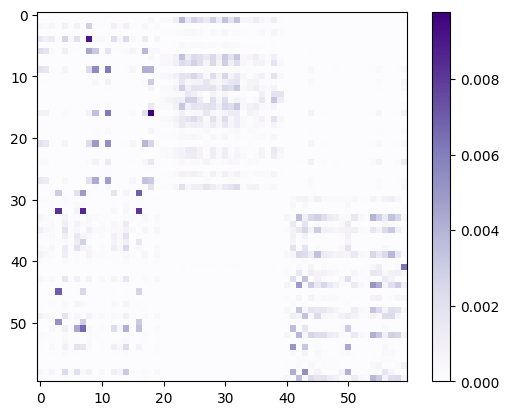

In [141]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

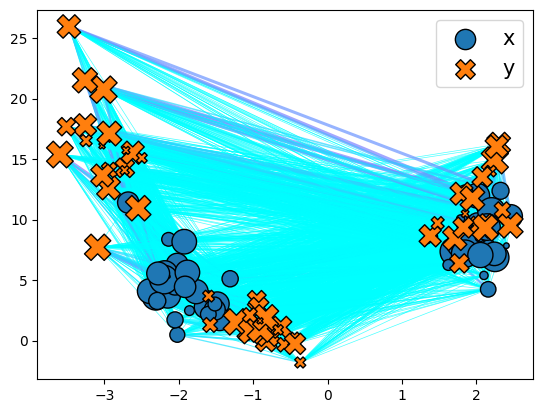

In [142]:
plott = ott.tools.plot.Plot()
_ = plott(ot)